# CMPT 423/820
## Assignment 4 Question 2
* Seyedeh Mina Mousavifar
* 11279515
* sem311

### Importing common libraries

In [56]:
%matplotlib inline

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing other libraries 
We'll import the SVM library, and the library that lets us work with artificial and built-in datasets.

In [58]:
from sklearn import svm
from sklearn import datasets

### A function to visualize how a classifier works on given data
The function below is basically MatPlotLib magic to make nice visualizations of the SVM classifier for simple 2D data.  It fits the given classifier, and retrieves the support vectors from it afterward.  AS a result, it's specialized to 2D SVM models.

The separating hyperplane is a solid line, and the two margins are visualized as dashed lines.  The support vectors, i.e., the data points that contribute towards the location of the separating hyperplane, are visualized as circled points.  Data that are not circled do not affect the location of the hyperplane.

You can call this function without having to understand everything it's doing. 

In [59]:
def plot_hyperplane(svm_clf, X, y, title_in):
    """ Plot the separating hyperplane determined by svm_clf on data X with classes y.
        The classifier svm_clf is assumed not to have been fitted to the data already.
        Data is assumed to be 2D, with exactly 2 class labels.
    """
    # first do the fitting
    svm_clf.fit(X, y)
    
    # plot the data values X
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm_clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(svm_clf.support_vectors_[:, 0], svm_clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    
    plt.title(title_in)
    plt.show()

### Generate some synthetic data
We can generate some synthetic data using some built in tools provided by scikit in the library ```sklearn.datasets```.  
* ```make_blobs()``` creates separable clusters in 2D.
* ```make_circles()``` creates a blob with a circle around it.
* ```make_moons()``` creates semi-circles that are not linearly separable

For the ```plot_hyperplane()``` function above, we're limited to two classes for the visualization.  To generate new data change the ```random_state``` value.  

These datasets are 2D, so we can visualize them.  

In [60]:
blob_X, blob_y = datasets.make_blobs(n_samples=40, centers=2, random_state=34)
circ_X, circ_y = datasets.make_circles(n_samples=40, random_state=84)
moon_X, moon_y = datasets.make_moons(n_samples=40, random_state=61)

#### Regularization in  SVM models
In class, we approached regularization by formulating a Loss function that balanced error against the complexity of the model. 
$$ Loss(x, m) = Err(x, m) + \lambda Complexity(m) $$
When $\lambda$ gets bigger, the Complexity of the model contributes more to the Loss, and simpler models are emphasized.  

It turns out that some machine learning models, including SVM, traditionally use a different formulation:
$$ Loss(x, m) = C \times Err(x, m) + Complexity(m) $$
In this formulation, as $C$ gets smaller, the Complexity of the model contributes more to the Loss, and simpler models are emphasized.  

Either way, it's the relative balance between error and complexity that matters.  In the scikit libraries, we can indicate how to balance error and complexity using the keyword parameter ```C=1.0```  To emphasize Error, make ```C>>>1``` .  To emphasize complexity, make ```C<<1```.

#### Apply a simple linear SVM to some data

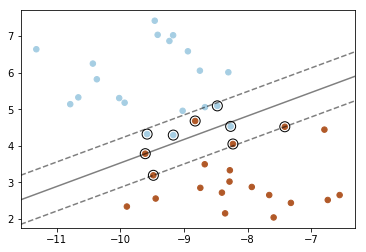

In [61]:
plot_hyperplane(svm.SVC(kernel='linear', C=1), blob_X, blob_y,'')

#### Apply SVM with a Polynomial Kernel to some data

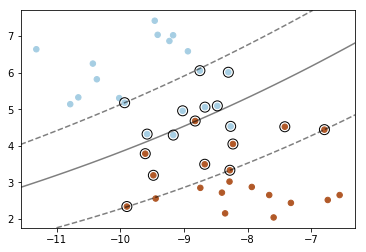

In [62]:
plot_hyperplane(svm.SVC(kernel='poly', degree=3, C=1), blob_X, blob_y,'')

#### Apply SVM with a Radial Basis Function Kernel to some data

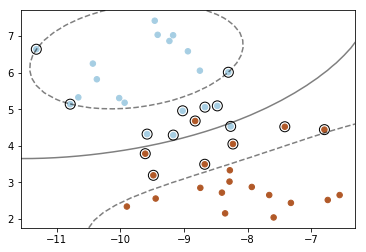

In [63]:
plot_hyperplane(svm.SVC(kernel='rbf', gamma=0.1, C=1), blob_X, blob_y, '')

# Question 1 --- Kernels!

Describe the term *kernel* in the context of Support Vector Machines.  Explain the polynomial kernel, and the Radial Basis function kernel.  

## Q1 Answer

### Kernel
Kernel is an approach for computing the dot product of two vectors in the transformed space. The idea is mapping the non-linear separable dataset into a higher dimensional space where we can find a hyperplane that can separate the samples. 


$$K(\mathbf{x}, \mathbf{y}) = \phi(\mathbf{x})^{\mathbf{T}}\phi( \mathbf{y})$$


Where $\mathbf{x}$ and $\mathbf{y}$ are vectors of features in the input space.


This means if we use a mapping function that maps our data into a higher-dimensional space, then, the maximization and decision rule will depend on the dot products of the mapping function for different samples. So, we need to know K and not the mapping function itself. This function is known as Kernel function, and it reduces the complexity of finding the mapping function.

#### Polynomial Kernel
*Polynomial Kernel* is useful when the data points are not linearly separable. This kernel represents the similarity of vectors in a feature space over polynomials of the original variables, allowing the learning of non-linear models. This kernel is widely used in Speech Recognition. Higher-order kernels tend to overfit the training data and thus do not generalize well.


$$K(\mathbf{x}, \mathbf{y}) = (\mathbf{x}^{\mathbf{T}}\mathbf{y} + c)^d$$


Where $\mathbf{x}$ and $\mathbf{y}$ are vectors of features in the input space, $d$ is the order of the kernel, and $c$ is a parameter that allows trading off the influence of higher-order versus lower-order terms in the polynomial.


#### Radial Basis function(RBF) Kernel
*Radial Basic Function Kernel (RBF)* is useful when the data points are not linearly separable. It is a general-purpose kernel appropriate for when there is no prior knowledge about the data. This kernel is widely used in Computer Vision.


$$K(\mathbf{x}, \mathbf{y}) = exp(-\frac{||\mathbf{x} - \mathbf{y}||^2}{2\sigma^{2}})$$


Where $\mathbf{x}$ and $\mathbf{y}$ are vectors of features in the input space, $||\mathbf{x} - \mathbf{y}||^2$ is the *squared Euclidean distance* between the two feature vectors, and $\sigma$ is a parameter that acts as a smoothing parameter that determines the influence of each of the points.

# Question 2 --- Exploring the balance between error and model complexity

Explore what happens to the three models (```linear```, ```poly```, ```rbf```) when you change ```C```.  Use ```C=1000``` and ```C=0.001``` **on the blob dataset.**  Your answer may depend on the dataset you are using (so if you change the ```random_state```, the behaviour may change).   

## Q2 Answer

On the one hand, for large values of ```C```, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. This will result in a lower misclassification rate on the training rate and possibly overfitting. On the other hand, a smaller ```C``` will encourage a larger margin, therefore a more straightforward decision function, at the cost of training accuracy. As the objective function in SVM is the sum of a regularization term and the misclassification rate, ```C``` behaves as a regularization parameter.

### Linear Kernel

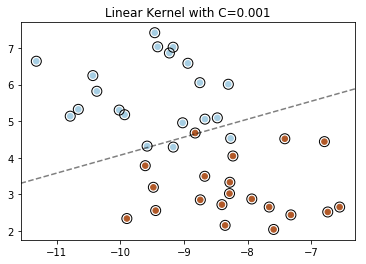

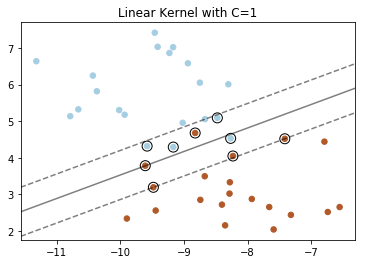

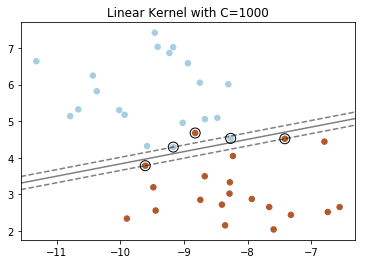

In [64]:
# C = 0.001
C_val = 0.001
title = 'Linear Kernel with C=' + str(C_val)
plot_hyperplane(svm.SVC(kernel='linear', C=C_val), blob_X, blob_y, title)

# C = 1
C_val = 1
title = 'Linear Kernel with C=' + str(C_val)
plot_hyperplane(svm.SVC(kernel='linear', C=C_val), blob_X, blob_y, title)

# C = 1000
C_val = 1000
title = 'Linear Kernel with C=' + str(C_val)
plot_hyperplane(svm.SVC(kernel='linear', C=C_val), blob_X, blob_y, title)

In the linear kernel, ```C=0.001``` has a large margin with four misclassified points. As we increase ```C```, the margin decreases along with the misclassified points. In ```C=1000``` the misclassification reduces to one point which might become prone to overfit on the test set.

### Polynomial Kernel

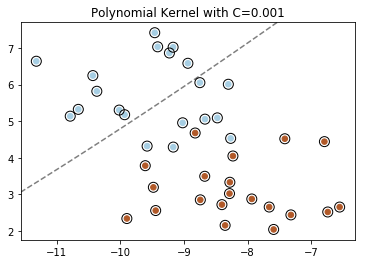

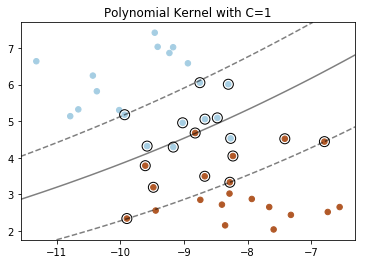

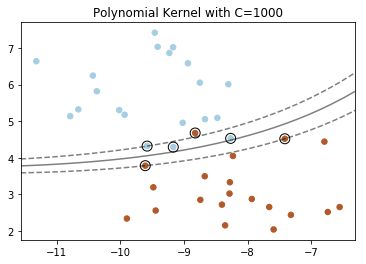

In [65]:
# C = 0.001
C_val = 0.001
title = 'Polynomial Kernel with C=' + str(C_val)
plot_hyperplane(svm.SVC(kernel='poly', degree=3, C=C_val), blob_X, blob_y, title)

# C = 1
C_val = 1
title = 'Polynomial Kernel with C=' + str(C_val)
plot_hyperplane(svm.SVC(kernel='poly', degree=3, C=C_val), blob_X, blob_y, title)

# C = 1000
C_val = 1000
title = 'Polynomial Kernel with C=' + str(C_val)
plot_hyperplane(svm.SVC(kernel='poly', degree=3, C=C_val), blob_X, blob_y, title)

In the polynomial kernel, ```C=0.001``` has a large margin with many misclassified points. As we increase $C$, the decision boundary has higher orders, and the margin decreases along with the misclassified points. In ```C=1000``` the misclassification reduces to one point which might become prone to overfit on the test set.

### RBF Kernel

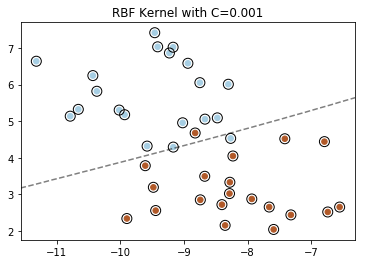

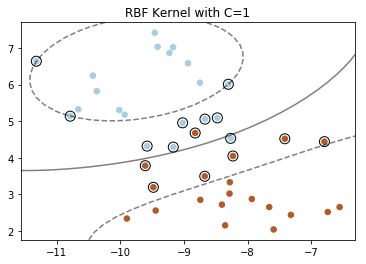

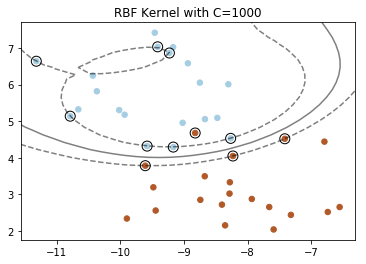

In [66]:
# C = 0.001
C_val = 0.001
title = 'RBF Kernel with C=' + str(C_val)
plot_hyperplane(svm.SVC(kernel='rbf', gamma=0.1, C=C_val), blob_X, blob_y, title)

# C = 1
C_val = 1
title = 'RBF Kernel with C=' + str(C_val)
plot_hyperplane(svm.SVC(kernel='rbf', gamma=0.1, C=C_val), blob_X, blob_y, title)

# C = 1000
C_val = 1000
title = 'RBF Kernel with C=' + str(C_val)
plot_hyperplane(svm.SVC(kernel='rbf', gamma=0.1, C=C_val), blob_X, blob_y, title)

In the RBF kernel, ```C=0.001``` has a large margin with many misclassified points. As we increase $C$, the decision boundary shape becomes more complex, and the margin decreases along with the misclassified points. In ```C=1000``` the misclassification reduces to one point which might become prone to overfit on the test set.

# Question 3 --- Polynomial Kernel Exploration
Explore the Polynomial kernel, by using the optional keyword parameter ```degree``` which is available in scikit, **on the blob dataset.**  Use a couple of different integers for the degree (in the range 2-5, to limit computation times), and explain what happens. You may explore other ```svm.SVC``` parameters in the context of exploring degree, but this is optional.

## Q3 Answer

```degree``` denotes the degree of the polynomial kernel function. Higher-order kernels tend to overfit the training data and thus do not generalize well.

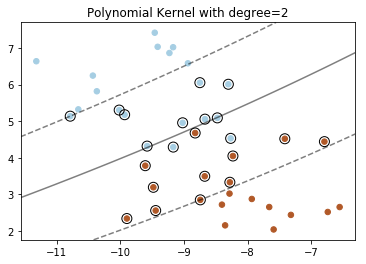

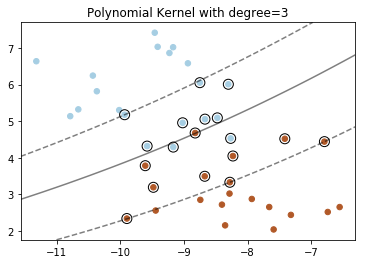

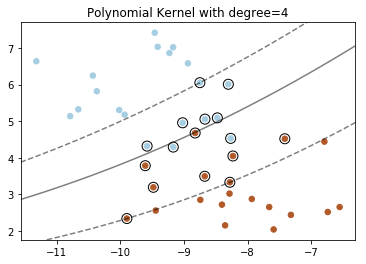

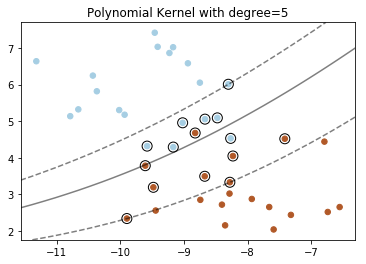

In [67]:
# set C to default
C_val = 1

for i in range(2,6):
    title = 'Polynomial Kernel with degree=' + str(i)
    plot_hyperplane(svm.SVC(kernel='poly', degree=i, C=C_val), blob_X, blob_y, title)

As the ```degree``` increases, the decision boundary shape becomes more complex and has more accuracy on the training set. But, higher orders would have less generalization that might to overfitting on the test set.

# Question 4 --- RBF Kernel Exploration
Explore the Radial Basis Function kernel, by using the optional keyword parameter ```gamma```, **on the blob dataset.**  Try various extreme values for ```gamma```, and explain what happens.  You may explore other ```svm.SVC``` parameters in the context of exploring degree, but this is optional.

## Q4 Answer

The ```gamma``` parameter defines how far the influence of a single training example reaches, with low values meaning far and high values indicating close. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors. When ```gamma``` is low, the curve of the decision boundary is very low, and thus the decision region is very broad. When ```gamma``` is high, the curve of the decision boundary is high. So this parameter adjusts the curvature of the decision boundary.

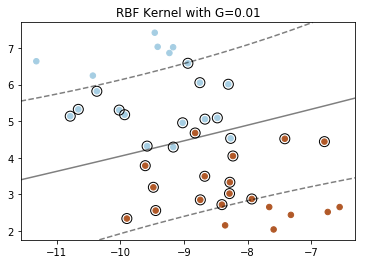

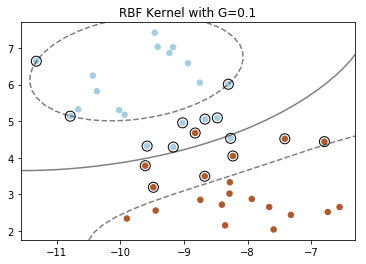

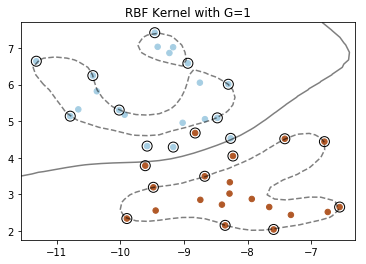

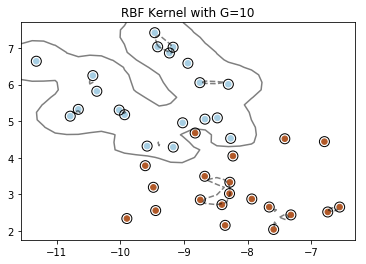

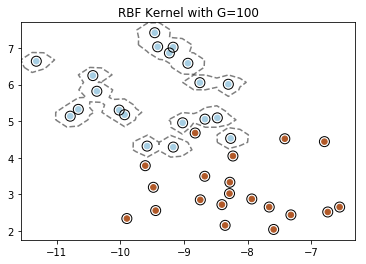

In [79]:
C_val = 1

for i in range(-2,3):
    Gamma_val = 10**i
    title = 'RBF Kernel with G=' + str(Gamma_val)
    plot_hyperplane(svm.SVC(kernel='rbf', gamma=Gamma_val, C=C_val), blob_X, blob_y, title)

The behaviour of the model is very sensitive to the gamma parameter. When ```gamma``` is very small, the model is too constrained and cannot capture the complexity of the data. The region of influence of any selected support vector would include the whole training set. The resulting model will behave similarly to a linear model with a set of hyperplanes that separate the centers of a high density of any pair of two classes.  When ```gamma``` is too large, the radius of the area of influence of the support vectors only includes the support vector itself, and it tends to overfit.

# Question 5 --- Other synthetic datasets

Explore all three different kernels on the two other datasets above.  Choose a parameter setting for each kernel, including a value for ```C```, that seems to be lead to what you consider a good fit.  Explain briefly why you decided on the ```svm.SVC``` parameter settings that you chose.

## Q5 Answer

As *scikit learn* documentation indicates, ```C``` is one by default and should be decreased in case of noisy observations. 

### Circles Dataset

#### Linear Kernel

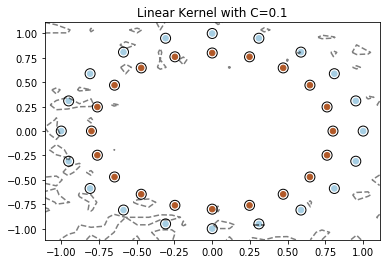

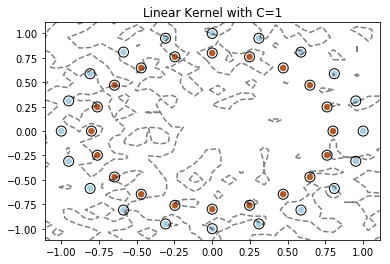

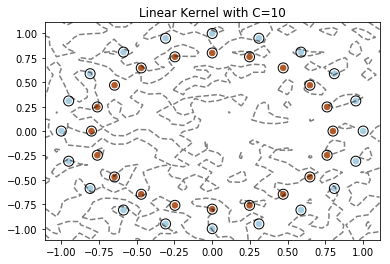

In [80]:
for i in range(-1,2):
    C_val = 10**i
    title = 'Linear Kernel with C=' + str(C_val)
    plot_hyperplane(svm.SVC(kernel='linear', C=C_val), circ_X, circ_y, title)

Because the data is circular, the linear kernel doesn't fit well, and changing ```C``` doesn't affect misclassification.

#### Polynomial Kernel

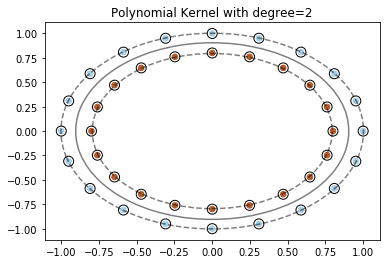

In [85]:
# set C to default
C_val = 1

for i in range(2,3):
    title = 'Polynomial Kernel with degree=' + str(i)
    plot_hyperplane(svm.SVC(kernel='poly', degree=i, C=C_val), circ_X, circ_y, title)

The polynomial kernel fits our dataset well in even orders. Consequently, ```degree=2``` classifies correctly and has low computational complexity.

#### RBF Kernel

In [ ]:
C_val = 1

for i in range(-3,4):
    Gamma_val = 10**i
    title = 'RBF Kernel with G=' + str(Gamma_val)
    plot_hyperplane(svm.SVC(kernel='rbf', gamma=Gamma_val, C=C_val), blob_X, blob_y, title)

### Moon Dataset

#### Linear Kernel

#### Polynomial Kernel

#### RBF Kernel

# Marking Scheme

1. 6 Marks **Kernels!** 
  * (2 marks) You description of the term *kernel* demonstrated understanding.
  * (2 marks) Your description of the polynomial kernel demonstrated understanding.
  * (2 marks) Your description of the Radial Basis function kernel demonstrated understanding. 


2.  6 Marks **Balance between error and model complexity**.
  * (2 marks) Your discussion on the behaviour of the ```linear``` kernel as ```C``` changes reflects an understanding of SVM.
  * (2 marks) Your discussion on the behaviour of the ```poly``` kernel as ```C``` changes reflects an understanding of SVM.
  * (2 marks) Your discussion on the behaviour of the ```rbf``` kernel as ```C``` changes reflects an understanding of SVM.


3.  3 marks **Explore the Polynomial kernel**
  * (3 marks) Your explanation of the behaviour of the polynomial kernel with different degrees reflects an understanding of SVM.


4. 3 marks **Explore the Radial Basis Function kernel** 
  * (3 marks) Your explanation of the behaviour of the Radial Basis Function kernel with different degrees reflects an understanding of SVM.


5. 6 marks **Other datasets** 
  * (3 marks) Your explanation for your choice of parameters for all three kernels reflects an understanding of the application of SVM to the ```circ``` dataset created by ```make_circles```.
  * (3 marks) Your explanation for your choice of parameters for all three kernels reflects an understanding of the application of SVM to the ```moon``` dataset created by ```make_moons```.
        